<a href="https://colab.research.google.com/github/Aryaagunawan/-Aplikasi-Pengelolaan-Data-Menggunakan-DOM-dan-Web-Storage/blob/main/Proyek_Submission_Klasifikasi_Gambar.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Proyek Klasifikasi Gambar: Plastic - Paper - Garbage Bag Synthetic Images
- **Nama:** Arya Gunawan
- **Email:** aryakk008@gmail.com
- **ID Dicoding:** aryagunawan_12

## Import Semua Packages/Library yang Digunakan

In [2]:
# Instalasi TensorFlow.js (hanya perlu dijalankan sekali)
!pip install tensorflowjs

# Standard Libraries
import os
import random
import shutil
import pathlib

# Gambar dan Visualisasi
from PIL import Image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np

# Unduh dari Google Drive
import gdown

# TensorFlow dan Keras
import tensorflow as tf
from tensorflow.keras import layers, models, optimizers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dropout, Dense, GlobalAveragePooling2D
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import EfficientNetV2B0, MobileNetV2

## Data Preparation

### Data Loading

Dataset bersumber dari Kaggle. Namun dataset sudah diupload ke google drive pribadi agar memudahkan untuk didownload.

In [3]:
file_id = "1jn5y36dIm2_J94xCydpMvFOGDwjVHfkC"
output_file = "Bag_Classes.zip"

gdown.download(f"https://drive.google.com/uc?id={file_id}", output_file, quiet=False)

Downloading...
From (original): https://drive.google.com/uc?id=1jn5y36dIm2_J94xCydpMvFOGDwjVHfkC
From (redirected): https://drive.google.com/uc?id=1jn5y36dIm2_J94xCydpMvFOGDwjVHfkC&confirm=t&uuid=5515f30d-b97b-4975-aa4f-6dc21b1d8313
To: /content/Bag_Classes.zip
100%|██████████| 233M/233M [00:03<00:00, 74.7MB/s]


'Bag_Classes.zip'

Melakukan unzip file yang sudah di download

In [4]:
!unzip Bag_Classes.zip

Streaming output truncated to the last 5000 lines.
  inflating: Bag_Classes/Plastic-Bag/00000000.jpg  
  inflating: Bag_Classes/Plastic-Bag/00000001.jpg  
  inflating: Bag_Classes/Plastic-Bag/00000002.jpg  
  inflating: Bag_Classes/Plastic-Bag/00000003.jpg  
  inflating: Bag_Classes/Plastic-Bag/00000004.jpg  
  inflating: Bag_Classes/Plastic-Bag/00000005.jpg  
  inflating: Bag_Classes/Plastic-Bag/00000006.jpg  
  inflating: Bag_Classes/Plastic-Bag/00000007.jpg  
  inflating: Bag_Classes/Plastic-Bag/00000008.jpg  
  inflating: Bag_Classes/Plastic-Bag/00000009.jpg  
  inflating: Bag_Classes/Plastic-Bag/00000010.jpg  
  inflating: Bag_Classes/Plastic-Bag/00000011.jpg  
  inflating: Bag_Classes/Plastic-Bag/00000012.jpg  
  inflating: Bag_Classes/Plastic-Bag/00000013.jpg  
  inflating: Bag_Classes/Plastic-Bag/00000014.jpg  
  inflating: Bag_Classes/Plastic-Bag/00000015.jpg  
  inflating: Bag_Classes/Plastic-Bag/00000016.jpg  
  inflating: Bag_Classes/Plastic-Bag/00000017.jpg  
  inflating: 

Menampilkan jumlah gambar dari masing-masing kelas dan Menghitung jumlah gambar dengan resolusi tertentu

In [5]:
def analyze_image_distribution(folder_path, target_res=None):
    # Menyimpan jumlah gambar per kelas
    class_image_counts = {}

    # Menyimpan jumlah gambar per resolusi
    resolution_image_counts = {}

    # Menyimpan jumlah gambar dengan resolusi tertentu (misalnya 256x256)
    target_res_count = 0

    # Mengiterasi setiap folder dan gambar di dalam folder
    for current_dir, _, images in os.walk(folder_path):
        # Mengabaikan folder root itu sendiri
        if current_dir == folder_path:
            continue

        # Menentukan label (nama folder) yang mewakili kelas
        label = os.path.basename(current_dir)
        class_image_counts[label] = 0

        # Mengiterasi setiap file gambar dalam folder
        for img_file in images:
            img_path = os.path.join(current_dir, img_file)
            try:
                # Membuka gambar dan memeriksa ukurannya
                with Image.open(img_path) as image:
                    img_size = f"{image.width}x{image.height}"

                    # Menambahkan jumlah gambar pada kelas
                    class_image_counts[label] += 1

                    # Menambahkan jumlah gambar berdasarkan resolusi
                    resolution_image_counts[img_size] = resolution_image_counts.get(img_size, 0) + 1

                    # Menghitung jumlah gambar yang memiliki resolusi target_res tertentu
                    if target_res and img_size == target_res:
                        target_res_count += 1
            except Exception as e:
                # Menangani error jika gambar tidak dapat dibuka
                print(f"Tidak bisa membuka gambar {img_path}: {e}")

    return class_image_counts, resolution_image_counts, target_res_count

# Contoh penggunaan
dataset_dir = "/content/Bag_Classes"  # Path ke dataset
target_res = "256x256"  # Resolusi yang ingin dihitung

# Mengambil hasil analisis
class_counts, resolution_counts, specific_res_count = analyze_image_distribution(dataset_dir, target_res)

# Menampilkan jumlah gambar per kelas
print("Jumlah gambar per kelas:")
for label, count in class_counts.items():
    print(f"{label}: {count}")

# Menampilkan jumlah gambar per resolusi
print("\nJumlah gambar per resolusi:")
for res, count in resolution_counts.items():
    print(f"{res}: {count}")

# Menampilkan jumlah gambar dengan resolusi target_res
print(f"\nJumlah gambar dengan resolusi {target_res}: {specific_res_count}")

Jumlah gambar per kelas:
Plastic-Bag: 5000
Paper-Bag: 5000
Garbage-Bag: 5000

Jumlah gambar per resolusi:
300x300: 15000

Jumlah gambar dengan resolusi 256x256: 0


Dataset ini seimbang, dengan 5000 gambar per kelas (Garbage-Bag, Plastic-Bag, Paper-Bag). Semua gambar memiliki resolusi yang sama, yaitu 300x300 piksel, sesuai dengan target resolusi. Tidak ada masalah ketidakseimbangan kelas atau variasi resolusi, yang ideal untuk pelatihan model.

Gambar diubah dengan resolusi antara 200 hingga 256

In [6]:
def resize_and_update_images(folder_path, min_resolution=200, max_resolution=256):

    for root, dirs, files in os.walk(folder_path):
        for image_file in files:
            image_path = os.path.join(root, image_file)
            try:
                with Image.open(image_path) as img:
                    # Generate new random resolution within specified range
                    new_width = random.randint(min_resolution, max_resolution)
                    new_height = random.randint(min_resolution, max_resolution)

                    # Resize the image using LANCZOS filter
                    resized_image = img.resize((new_width, new_height), Image.Resampling.LANCZOS)

                    # Save the resized image back to the same path, overwriting the original
                    resized_image.save(image_path)
            except Exception as e:
                print(f"Error processing image {image_path}: {e}")

# Path to the folder containing the images
folder_path = "/content/Bag_Classes"

# Call the function to resize and replace images
resize_and_update_images(folder_path)

Menampilkan kembali total gambar berdasarkan setiap resolusi.

In [7]:
def count_images_and_resolution(base_path, target_resolution=None):
    # Dictionary untuk menyimpan jumlah gambar per kelas
    class_count = {}

    # Dictionary untuk menyimpan jumlah gambar per resolusi
    resolution_count = {}

    # Melakukan iterasi ke semua folder dan file di dalam base_path
    for root, dirs, files in os.walk(base_path):
        # Mengabaikan folder root yang tidak memiliki gambar (hanya subfolder yang diinginkan)
        if root == base_path:
            continue

        # Mendapatkan nama kelas berdasarkan nama folder
        class_name = os.path.basename(root)

        # Menghitung jumlah gambar dalam folder (kelas) tersebut
        class_count[class_name] = len(files)

        # Iterasi setiap file gambar di folder tersebut
        for file in files:
            file_path = os.path.join(root, file)

            # Membuka gambar untuk memeriksa resolusinya
            with Image.open(file_path) as img:
                width, height = img.size
                resolution = f"{width}x{height}"

                # Menambahkan resolusi ke dictionary jika belum ada
                if resolution not in resolution_count:
                    resolution_count[resolution] = 0

                # Menambahkan jumlah gambar dengan resolusi tertentu
                resolution_count[resolution] += 1

                # Menghitung jumlah gambar dengan resolusi target_resolution, jika diberikan
                if target_resolution and resolution == target_resolution:
                    if 'target' not in resolution_count:
                        resolution_count['target'] = 0
                    resolution_count['target'] += 1

    # Mengembalikan hasil perhitungan gambar per kelas dan resolusi
    return class_count, resolution_count

# Path ke folder utama yang berisi gambar
base_path = "/content/Bag_Classes"

# Resolusi yang ingin dihitung (misalnya "256x256")
target_resolution = "256x256"

# Memanggil fungsi untuk mendapatkan jumlah gambar per kelas dan resolusi
class_count, resolution_count = count_images_and_resolution(base_path, target_resolution)

# Menampilkan jumlah gambar per resolusi
print("\nJumlah gambar per resolusi:")
for resolution, count in resolution_count.items():
    print(f"{resolution}: {count}")



Jumlah gambar per resolusi:
222x221: 6
206x230: 4
226x212: 8
204x211: 5
231x250: 6
212x256: 8
251x241: 4
254x240: 2
242x223: 4
232x233: 8
238x234: 5
202x241: 7
234x250: 5
256x218: 1
203x209: 7
207x201: 5
230x230: 5
230x232: 5
253x202: 3
210x246: 5
225x217: 6
203x206: 5
209x231: 5
242x231: 8
219x205: 5
203x230: 8
225x207: 6
232x211: 6
215x227: 4
241x250: 7
253x204: 7
251x247: 7
217x233: 7
222x223: 3
209x225: 7
247x205: 4
242x235: 5
210x209: 3
216x245: 5
251x200: 4
244x200: 11
222x226: 13
231x248: 6
210x216: 4
202x208: 8
251x201: 5
234x229: 6
249x244: 5
234x235: 7
225x220: 2
217x248: 5
238x237: 9
235x223: 9
209x249: 5
228x208: 5
210x227: 3
207x252: 6
240x205: 6
239x228: 4
221x255: 6
247x248: 4
247x226: 5
227x249: 6
226x223: 4
247x218: 7
236x225: 7
244x213: 4
231x242: 7
200x238: 7
219x216: 6
240x200: 6
244x203: 4
256x212: 6
221x218: 6
214x224: 7
237x212: 10
207x214: 6
224x220: 7
236x244: 10
209x256: 4
252x210: 5
209x245: 4
233x252: 2
244x227: 3
240x250: 3
231x247: 5
201x221: 2
210x238: 4

Tampak bahwa saat ini gambar memiliki beragam resolusi.

### Data Preprocessing

Fungsi Penghitung Jumlah Gambar per Kelas dalam Dataset Multi-Kelas

In [9]:
# Fungsi untuk menghitung jumlah gambar di setiap kelas dalam folder dataset
def count_all_classes(base_dir):
    class_counts = {}

    # Menjelajahi seluruh folder di dalam direktori utama
    for root, _, files in os.walk(base_dir):
        class_name = os.path.basename(root)

        # Melewati folder utama itu sendiri, hanya ambil subfolder yang merupakan nama kelas
        if class_name != os.path.basename(base_dir):
            class_counts[class_name] = len(files)

    return class_counts

# Path ke folder utama dataset
base_path = "/content/Bag_Classes"

# Memanggil fungsi untuk menghitung gambar per kelas
class_distribution = count_all_classes(base_path)

# Menampilkan hasil jumlah gambar untuk setiap kelas
print("Jumlah gambar per kelas:")
for class_name, count in class_distribution.items():
    print(f"{class_name}: {count}")


Jumlah gambar per kelas:
Plastic-Bag: 5000
Paper-Bag: 5000
Garbage-Bag: 5000


Menyalin Semua Folder Kelas ke Folder Baru yaitu dataset

In [10]:
# Fungsi untuk menyalin seluruh folder kelas dari direktori asal ke tujuan
def copy_all_class_folders(source_dir, destination_dir):
    # Membuat folder tujuan jika belum ada
    if not os.path.exists(destination_dir):
        os.makedirs(destination_dir)

    # Menelusuri semua folder langsung di dalam source_dir
    for item in os.listdir(source_dir):
        source_path = os.path.join(source_dir, item)
        destination_path = os.path.join(destination_dir, item)

        # Salin hanya jika item adalah folder
        if os.path.isdir(source_path):
            if not os.path.exists(destination_path):
                shutil.copytree(source_path, destination_path)
                print(f" Folder '{item}' berhasil disalin ke: {destination_path}")

# Path asal (folder berisi semua kelas)
source_directory = "/content/Bag_Classes"

# Path tujuan (folder dataset akhir)
destination_directory = "/content/dataset"

# Menjalankan fungsi
copy_all_class_folders(source_directory, destination_directory)

menampilkan 4 gambar contoh dari masing-masing kelas

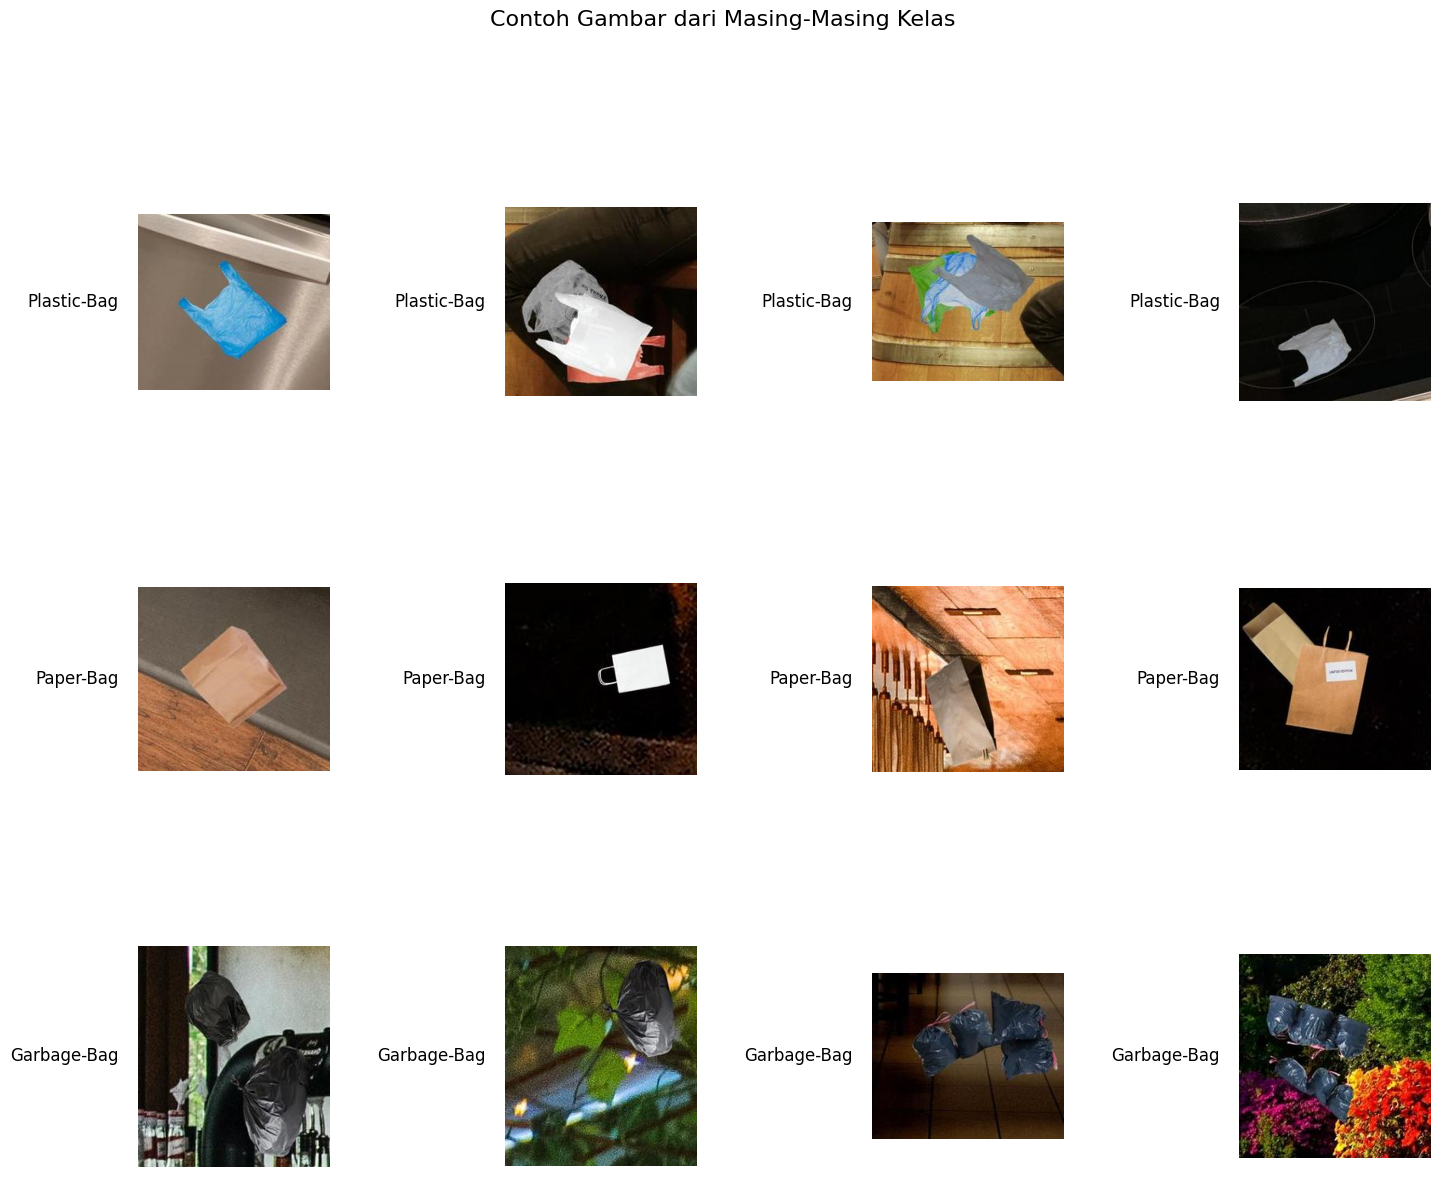

In [11]:
# Fungsi untuk menampilkan 4 gambar contoh dari masing-masing kelas
def show_example_images(base_path, num_images=4):
    class_images = {}

    # Menelusuri semua folder di dalam base_path untuk mengumpulkan gambar
    for root, dirs, files in os.walk(base_path):
        if files:
            class_name = os.path.basename(root)
            # Mengambil sejumlah gambar (misalnya 4) secara acak dari tiap kelas
            selected_images = random.sample(files, min(num_images, len(files)))
            class_images[class_name] = [os.path.join(root, img) for img in selected_images]

    # Menampilkan gambar-gambar tersebut
    num_classes = len(class_images)

    # Membuat grid yang lebih rapi untuk menampilkan gambar
    fig, axes = plt.subplots(num_classes, num_images, figsize=(15, num_classes * 4))
    fig.suptitle('Contoh Gambar dari Masing-Masing Kelas', fontsize=16, y=1.05)

    for i, (class_name, image_paths) in enumerate(class_images.items()):
        for j, image_path in enumerate(image_paths):
            img = Image.open(image_path)
            ax = axes[i, j] if num_classes > 1 else axes[j]
            ax.imshow(img)
            ax.axis('off')  # Menghilangkan sumbu

            # Menambahkan teks nama kelas di kiri gambar
            ax.text(-0.1, 0.5, class_name, fontsize=12, verticalalignment='center', horizontalalignment='right', transform=ax.transAxes)

    plt.tight_layout(pad=3.0)  # Memberi jarak antara gambar
    plt.subplots_adjust(top=0.95)  # Menyesuaikan posisi judul
    plt.show()

# Path ke folder dataset
base_path = "/content/dataset"

# Menampilkan gambar contoh dari masing-masing kelas
show_example_images(base_path)


#### Split Dataset

Memisahkan dataset menjadi data pelatihan dan pengujian dengan proporsi 8:2.

In [12]:
# Fungsi untuk membagi dataset menjadi folder train dan test
def split_dataset(base_path, train_ratio=0.8):
    # Path untuk dataset pelatihan dan pengujian
    train_path = os.path.join(base_path, 'train')
    test_path = os.path.join(base_path, 'test')

    # Membuat folder train dan test jika belum ada
    os.makedirs(train_path, exist_ok=True)
    os.makedirs(test_path, exist_ok=True)

    # Menelusuri setiap folder kelas di dalam dataset
    for root, dirs, files in os.walk(base_path):
        # Melewati folder root dan folder train/test
        if root == base_path or 'train' in root or 'test' in root:
            continue

        # Nama kelas berdasarkan nama folder
        class_name = os.path.basename(root)

        # Membuat folder untuk masing-masing kelas di dalam folder train dan test
        train_class_path = os.path.join(train_path, class_name)
        test_class_path = os.path.join(test_path, class_name)
        os.makedirs(train_class_path, exist_ok=True)
        os.makedirs(test_class_path, exist_ok=True)

        # Mengacak urutan file
        random.shuffle(files)
        split_index = int(train_ratio * len(files))  # Menentukan batas untuk train/test
        train_files = files[:split_index]
        test_files = files[split_index:]

        # Memindahkan file gambar ke folder train
        for file in train_files:
            src_file = os.path.join(root, file)
            dst_file = os.path.join(train_class_path, file)
            shutil.move(src_file, dst_file)

        # Memindahkan file gambar ke folder test
        for file in test_files:
            src_file = os.path.join(root, file)
            dst_file = os.path.join(test_class_path, file)
            shutil.move(src_file, dst_file)

# Path ke folder utama dataset
base_path = "/content/dataset"

# Menjalankan fungsi untuk membagi dataset
split_dataset(base_path)


menghapus folder yang tidak termasuk folder train dan test

In [13]:
def delete_unwanted_folders(base_path, keep_folders=['train', 'test']):
    for item in os.listdir(base_path):
        item_path = os.path.join(base_path, item)
        if os.path.isdir(item_path) and item not in keep_folders:
            shutil.rmtree(item_path)
            print(f"Menghapus folder: {item_path}")

# Path ke folder utama
base_path = "/content/dataset"

delete_unwanted_folders(base_path)

Menghapus folder: /content/dataset/Plastic-Bag
Menghapus folder: /content/dataset/Paper-Bag
Menghapus folder: /content/dataset/Garbage-Bag


## Modelling

Menggunakan ImageDataGenerator untuk melakukan augmentasi, penskalaan ulang, dan perubahan ukuran target. Dataset uji hanya akan mengalami penskalaan ulang.

In [14]:
# Fungsi untuk melakukan augmentasi dan resize pada dataset
def augment_and_resize_dataset(base_path, img_size=(150, 150), batch_size=32):
    # Path ke folder train dan test
    train_path = os.path.join(base_path, 'train')
    test_path = os.path.join(base_path, 'test')

    # Mengatur augmentasi dan rescaling untuk dataset pelatihan
    train_datagen = ImageDataGenerator(
        rescale=1./255,  # Melakukan normalisasi piksel antara 0 dan 1
        zoom_range=0.2,  # Melakukan zoom pada gambar
        horizontal_flip=True,  # Melakukan flip horizontal pada gambar
        fill_mode='nearest'  # Mengisi piksel yang hilang setelah transformasi
    )

    # Hanya melakukan rescale pada dataset pengujian (test)
    test_datagen = ImageDataGenerator(rescale=1./255)

    # Membaca data dari folder train dan menghasilkan batch gambar dengan augmentasi
    train_generator = train_datagen.flow_from_directory(
        train_path,  # Path ke folder train
        target_size=img_size,  # Ukuran target gambar
        batch_size=batch_size,  # Ukuran batch yang dihasilkan
        class_mode='categorical'  # Kelas target dihasilkan secara kategorikal (untuk klasifikasi)
    )

    # Membaca data dari folder test dan hanya melakukan rescale tanpa augmentasi
    test_generator = test_datagen.flow_from_directory(
        test_path,  # Path ke folder test
        target_size=img_size,  # Ukuran target gambar
        batch_size=batch_size,  # Ukuran batch yang dihasilkan
        class_mode='categorical'  # Kelas target dihasilkan secara kategorikal (untuk klasifikasi)
    )

    return train_generator, test_generator

# Path ke folder dataset utama
base_path = "/content/dataset"

# Memanggil fungsi untuk mendapatkan train dan test generator
train_generator, test_generator = augment_and_resize_dataset(base_path)

Found 12000 images belonging to 3 classes.
Found 3000 images belonging to 3 classes.


Menampilkan kelas-kelas yang terdapat pada dataset.

In [15]:
# Menampilkan indeks kelas dari generator pelatihan
class_indices = train_generator.class_indices
print(class_indices)


{'Garbage-Bag': 0, 'Paper-Bag': 1, 'Plastic-Bag': 2}


Menggunakan transferlearning dari MobileNetV2. Input shape yang digunakan adalah 150x150, layers di freeze agar tidak dilatih kembali, dan menambahkan beberapa layer Conv dan Pooling.

In [16]:
# Memuat model MobileNetV2 pra-latih tanpa bagian atas (include_top=False) dan dengan ukuran input 150x150x3
from tensorflow.keras.optimizers import Adam # Importing the Adam optimizer
pre_trained_model = MobileNetV2(weights="imagenet", include_top=False, input_shape=(150, 150, 3))

# Membekukan semua lapisan di model pra-latih agar tidak dilatih ulang
for layer in pre_trained_model.layers:
    layer.trainable = False

# Menyusun model baru dengan menambahkan beberapa lapisan tambahan
model = Sequential()

# Menambahkan model pra-latih sebagai fitur ekstraktor
model.add(pre_trained_model)

# Menambahkan lapisan konvolusional dan pooling
model.add(Conv2D(32, (3, 3), activation='relu', padding='same'))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu', padding='same'))
model.add(MaxPooling2D((2, 2)))

# Mengubah bentuk data menjadi satu dimensi untuk lapisan Dense
model.add(Flatten(name="flatten"))

# Menambahkan lapisan Dropout untuk mengurangi overfitting
model.add(Dropout(0.5))

# Menambahkan lapisan Dense untuk klasifikasi
model.add(Dense(128, activation="relu"))
model.add(Dense(3, activation='softmax'))  # Menggunakan 4 kelas untuk output sesuai jumlah kelas Anda

# Menyusun model dengan optimizer Adam dan loss categorical_crossentropy untuk klasifikasi multi-kelas
model.compile(optimizer=Adam(), loss='categorical_crossentropy', metrics=['accuracy'])

# Ringkasan model untuk melihat arsitektur
model.summary()

<ipython-input-16-c60447c75549>:3: UserWarning: `input_shape` is undefined or non-square, or `rows` is not in [96, 128, 160, 192, 224]. Weights for input shape (224, 224) will be loaded as the default.
  pre_trained_model = MobileNetV2(weights="imagenet", include_top=False, input_shape=(150, 150, 3))


9406464/9406464 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ mobilenetv2_1.00_224            │ (None, 5, 5, 1280)     │     2,257,984 │
│ (Functional)                    │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d (Conv2D)                 │ (None, 5, 5, 32)       │       368,672 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 2, 2, 32)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 2, 2, 64)       │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 1, 1, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │         8,320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 3)              │           387 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,653,859 (10.12 MB)

 Trainable params: 395,875 (1.51 MB)

 Non-trainable params: 2,257,984 (8.61 MB)

Mengcompile model dengan optimizer Adam, loss categorical_crossentropy, dan metrics accuracy.

In [17]:
# Menggunakan optimizer Adam
optimizer = tf.optimizers.Adam()

# Menyusun model dengan optimizer, loss, dan metric yang sesuai
model.compile(optimizer=optimizer,
              loss='categorical_crossentropy',  # Digunakan untuk klasifikasi multi-kelas
              metrics=['accuracy'])  # Menghitung akurasi selama pelatihan


Membuat callbacks yang memonitor val_accuracy dan akan berhenti jika tidak mengalami perubahan selama 3 epochs.

In [18]:
# Callbacks
checkpoint = ModelCheckpoint('best_model.keras', monitor='val_loss', save_best_only=True, mode='min')
early_stopping = EarlyStopping(monitor='val_accuracy', patience=3, min_delta=0.001, restore_best_weights=True, mode='max', baseline=0.96)

Melatih model selama 10 epoch dan menggunakan data test sebagai validation.

In [19]:
# Menentukan jumlah epoch pelatihan
jumlah_epoch = 12

# Proses pelatihan model menggunakan data yang telah diproses sebelumnya
histori_pelatihan = model.fit(
    train_generator,                         # Data latih yang telah diaugmentasi
    epochs=jumlah_epoch,                     # Banyaknya iterasi pelatihan
    validation_data=test_generator,          # Data uji yang hanya di-rescale
    callbacks=[checkpoint, early_stopping],  # Menyimpan model terbaik & menghentikan overfitting
    verbose=1                                # Menampilkan progres pelatihan secara rinci
)


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/12
375/375 ━━━━━━━━━━━━━━━━━━━━ 385s 1s/step - accuracy: 0.8251 - loss: 0.4298 - val_accuracy: 0.9413 - val_loss: 0.1551
Epoch 2/12
375/375 ━━━━━━━━━━━━━━━━━━━━ 341s 910ms/step - accuracy: 0.9439 - loss: 0.1713 - val_accuracy: 0.9517 - val_loss: 0.1316
Epoch 3/12
375/375 ━━━━━━━━━━━━━━━━━━━━ 370s 986ms/step - accuracy: 0.9506 - loss: 0.1373 - val_accuracy: 0.9623 - val_loss: 0.1090
Epoch 4/12
375/375 ━━━━━━━━━━━━━━━━━━━━ 368s 982ms/step - accuracy: 0.9523 - loss: 0.1378 - val_accuracy: 0.9567 - val_loss: 0.1161
Epoch 5/12
375/375 ━━━━━━━━━━━━━━━━━━━━ 339s 903ms/step - accuracy: 0.9598 - loss: 0.1210 - val_accuracy: 0.9533 - val_loss: 0.1303
Epoch 6/12
375/375 ━━━━━━━━━━━━━━━━━━━━ 337s 900ms/step - accuracy: 0.9611 - loss: 0.1117 - val_accuracy: 0.9617 - val_loss: 0.1107


## Evaluasi dan Visualisasi

Memvisualisasikan grafik akurasi dan loss untuk data pelatihan dan validasi.

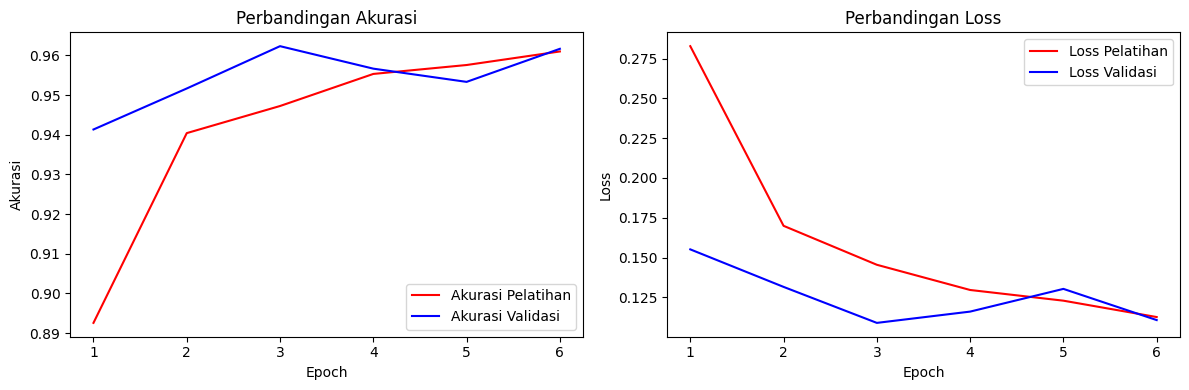


 Akurasi pada training set dan testing set sudah mencapai minimal 95%.


In [20]:
def visualisasi_histori_pelatihan(histori):
    # Mengambil data akurasi dan loss dari hasil training
    akurasi_latih = histori.history['accuracy']
    akurasi_validasi = histori.history['val_accuracy']
    loss_latih = histori.history['loss']
    loss_validasi = histori.history['val_loss']

    epoch_ke = range(1, len(akurasi_latih) + 1)

    # Membuat 2 plot: akurasi & loss
    plt.figure(figsize=(12, 4))

    # Plot akurasi
    plt.subplot(1, 2, 1)
    plt.plot(epoch_ke, akurasi_latih, 'r', label='Akurasi Pelatihan')
    plt.plot(epoch_ke, akurasi_validasi, 'b', label='Akurasi Validasi')
    plt.title('Perbandingan Akurasi')
    plt.xlabel('Epoch')
    plt.ylabel('Akurasi')
    plt.legend()

    # Plot loss
    plt.subplot(1, 2, 2)
    plt.plot(epoch_ke, loss_latih, 'r', label='Loss Pelatihan')
    plt.plot(epoch_ke, loss_validasi, 'b', label='Loss Validasi')
    plt.title('Perbandingan Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()

    plt.tight_layout()
    plt.show()

    # Mengambil akurasi dan loss dari history
    acc = histori.history['accuracy']
    val_acc = histori.history['val_accuracy']
    loss = histori.history['loss']
    val_loss = histori.history['val_loss']

    # Cek apakah akurasi terakhir >= 95%
    if acc[-1] >= 0.95 and val_acc[-1] >= 0.95:
        print(f"\n Akurasi pada training set dan testing set sudah mencapai minimal 95%.")
    else:
        print(f"\n Akurasi belum mencapai 95%.\nTraining: {acc[-1]*100:.2f}%, Validation: {val_acc[-1]*100:.2f}%")


# Menjalankan fungsi visualisasi
visualisasi_histori_pelatihan(histori_pelatihan)

## Konversi Model

Mengekspor model ke dalam format .h5.

In [21]:
model.save("model.h5")

### Konversi TFJS

In [22]:
!tensorflowjs_converter --input_format=keras model.h5 tfjs_model

2025-04-24 05:07:50.817687: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1745471270.843140   11825 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1745471270.850415   11825 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
🌲 Try https://ydf.readthedocs.io, the successor of TensorFlow Decision Forests with more features and faster training!
failed to lookup keras version from the file,
    this is likely a weight only file


### Konversi SavedModel

In [30]:
# Menentukan direktori untuk menyimpan model dalam format SavedModel
save_dir = os.path.join("saved_models", "klasifikasi")

# Membuat direktori jika belum ada
os.makedirs(save_dir, exist_ok=True)

# Menyimpan model ke path yang telah ditentukan
tf.saved_model.save(model, save_dir)

print(f"Model berhasil disimpan dalam format SavedModel di: {save_dir}")

Model berhasil disimpan dalam format SavedModel di: saved_models/klasifikasi


### Konversi TF-Lite

In [31]:
# Load the Keras model
model_TFLITE = tf.keras.models.load_model('model.h5')

# Convert the model to TensorFlow Lite format
converter = tf.lite.TFLiteConverter.from_keras_model(model_TFLITE)
tflite_model = converter.convert()

# Save the converted model to a file
with open("converted_model.tflite", "wb") as f:
    f.write(tflite_model)

Saved artifact at '/tmp/tmpw53da_hz'. The following endpoints are available:

* Endpoint 'serve'
  args_0 (POSITIONAL_ONLY): TensorSpec(shape=(None, 150, 150, 3), dtype=tf.float32, name='input_layer_1')
Output Type:
  TensorSpec(shape=(None, 3), dtype=tf.float32, name=None)
Captures:
  136277381355792: TensorSpec(shape=(), dtype=tf.resource, name=None)
  136277381351952: TensorSpec(shape=(), dtype=tf.resource, name=None)
  136277381352336: TensorSpec(shape=(), dtype=tf.resource, name=None)
  136277381351568: TensorSpec(shape=(), dtype=tf.resource, name=None)
  136277381354448: TensorSpec(shape=(), dtype=tf.resource, name=None)
  136277381350416: TensorSpec(shape=(), dtype=tf.resource, name=None)
  136277381353488: TensorSpec(shape=(), dtype=tf.resource, name=None)
  136277381354640: TensorSpec(shape=(), dtype=tf.resource, name=None)
  136277381356176: TensorSpec(shape=(), dtype=tf.resource, name=None)
  136277381350800: TensorSpec(shape=(), dtype=tf.resource, name=None)
  1362773813525

In [32]:
# Buat konten yang akan ditulis ke dalam file
content = """Garbage-Bag
Paper-Bag
Plastic-Bag"""

# Tentukan path dan nama file
file_path = "/content/klasifikasi.txt"

# Tulis konten ke dalam file
with open(file_path, "w") as file:
    file.write(content)

Membuat file zip agar bisa diunduh ke perangkat lokal.

In [33]:
# Tentukan folder yang akan di-zip
folder_models = '/content/models'
folder_tfjs_model = '/content/tfjs_model'

# Tentukan nama file zip output (tanpa ekstensi .zip)
output_models = '/content/models_compressed'
output_tfjs_model = '/content/tfjs_model_compressed'

# Mengarsipkan folder dan membuat file zip
shutil.make_archive(output_models, 'zip', folder_models)
shutil.make_archive(output_tfjs_model, 'zip', folder_tfjs_model)

print("Folder berhasil di-zip.")

Folder berhasil di-zip.


In [34]:
!pip freeze > requirements.txt

## Inference (Optional)

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step


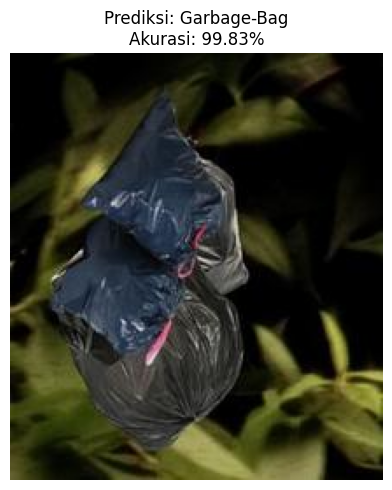

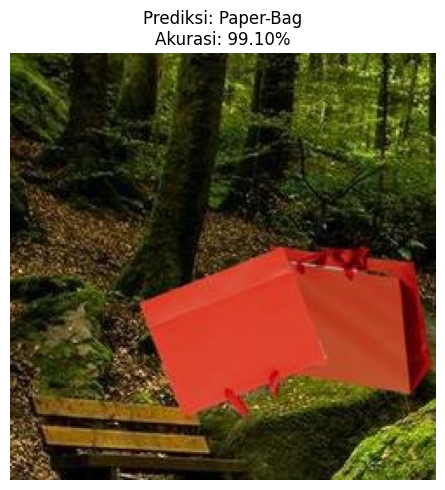

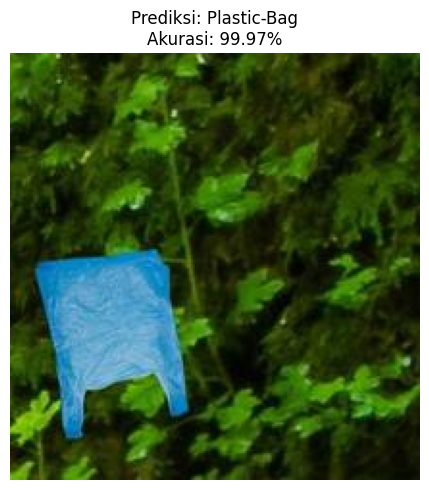

In [35]:
# Fungsi untuk memproses gambar
def images_preprocessing(filenames):
    image_tensors = []
    for filename in filenames:
        if os.path.exists(filename):
            image = tf.io.decode_image(open(filename, 'rb').read(), channels=3)
            image = tf.image.resize(image, [150, 150])
            image = image / 255.0
            image_tensor = tf.expand_dims(image, 0)
            image_tensors.append(image_tensor)
        else:
            print(f" File tidak ditemukan: {filename}")
            continue

    if not image_tensors:
        raise ValueError("Tidak ada gambar valid yang berhasil diproses.")

    batch_tensor = tf.concat(image_tensors, axis=0)
    return batch_tensor

# Daftar file gambar
filenames = [
    '/content/dataset/train/Garbage-Bag/00000000.jpg',
    '/content/dataset/train/Paper-Bag/00000001.jpg',
    '/content/dataset/train/Plastic-Bag/00000006.jpg'
]

# Proses gambar
image_tensors = images_preprocessing(filenames=filenames)

# Load model
model = tf.keras.models.load_model('model.h5')

# Prediksi
predictions = model.predict(image_tensors)

# Peta label
map_labels = {0: 'Garbage-Bag', 1: 'Paper-Bag', 2: 'Plastic-Bag'}

# Tampilkan hasil
for i, filename in enumerate(filenames):
    img = mpimg.imread(filename)
    pred = predictions[i]
    predicted_index = np.argmax(pred)
    predicted_label = map_labels[predicted_index]
    confidence = pred[predicted_index] * 100

    # Tampilan
    plt.figure(figsize=(5,5))
    plt.imshow(img)
    plt.axis('off')
    plt.title(f"Prediksi: {predicted_label}\nAkurasi: {confidence:.2f}%", fontsize=12)
    plt.tight_layout()
    plt.show()
